## Advertising Sales Channel Prediction

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
%matplotlib inline

In [18]:
os.chdir("C:\github_repo\Files")
df= pd.read_csv('Advertising.csv')   # Reading the data file
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [19]:
df.head()  # checking the first five raws from the data set

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [20]:
df.shape

(200, 5)

In [21]:
df.info()  # printing the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [22]:
df.isna().sum()  # finding the count of missing values from diffrent columns

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

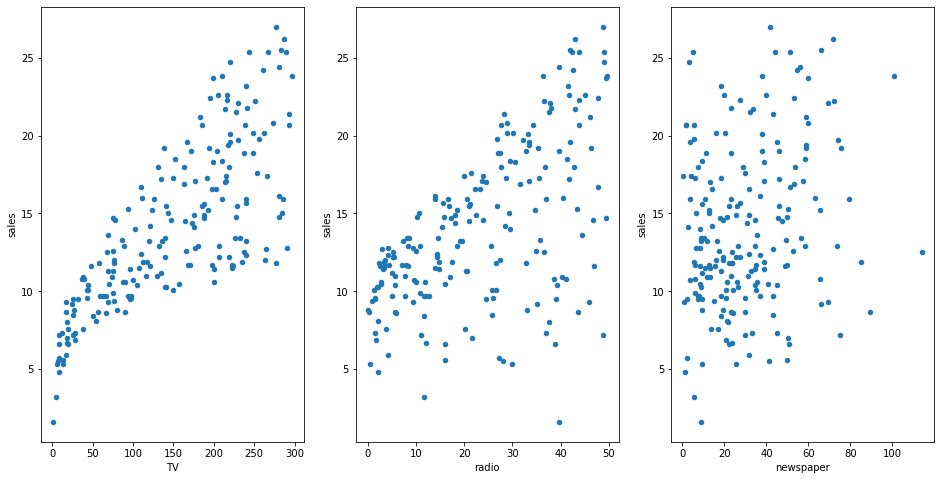

In [23]:
#  Visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3)

df.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16,8))
df.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
df.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])
fig.savefig('testdata.jpg')

## Exploratory Data Analysis(EDA)


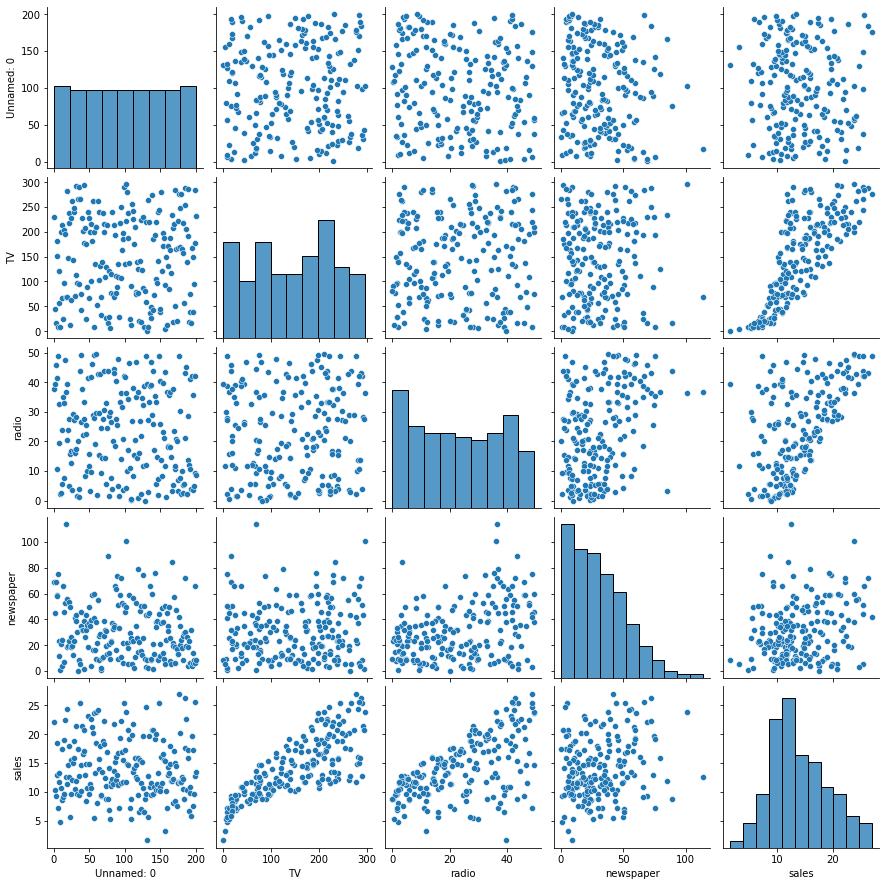

In [24]:
sns.pairplot(data) #scatterplot

<AxesSubplot:>

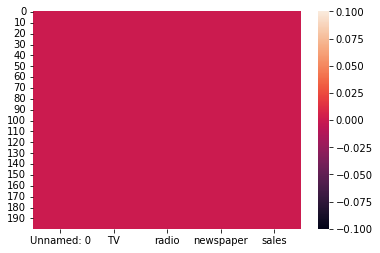

In [27]:
sns.heatmap(df.isnull()) #heatmap

In [26]:
#statistical view
df.describe()
df.sales.unique()
df.sales.value_counts(ascending=True)

22.1    1
19.8    1
17.2    1
16.9    1
22.2    1
       ..
10.6    3
12.9    4
11.7    4
15.9    4
9.7     5
Name: sales, Length: 121, dtype: int64

In [39]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [40]:
#BarPlote
i=0
x1=df.drop(['Unnamed: 0'],axis=1)
y1=df['sales']

In [41]:
y1

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

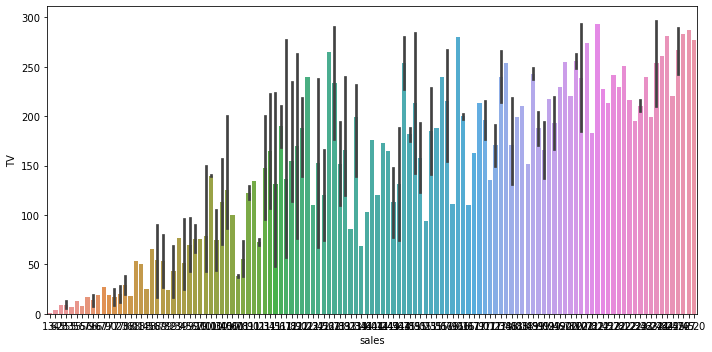

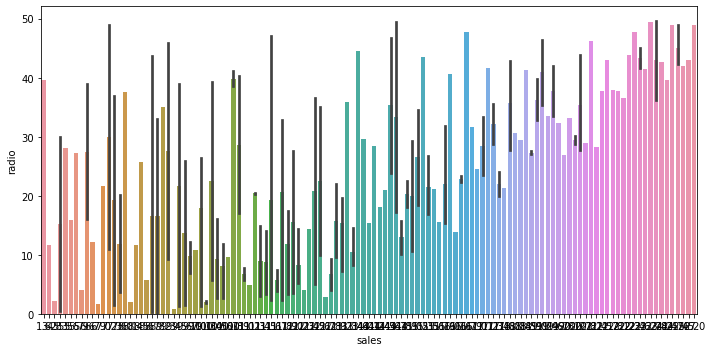

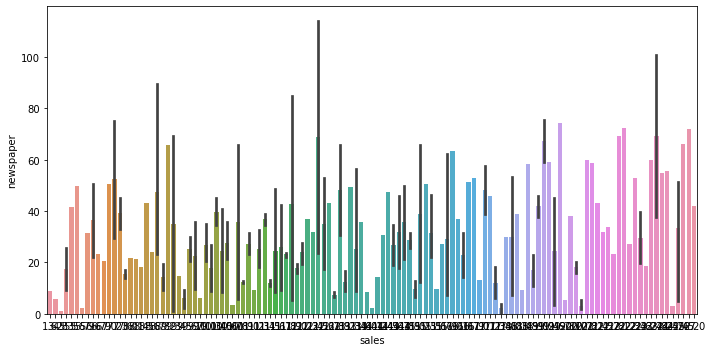

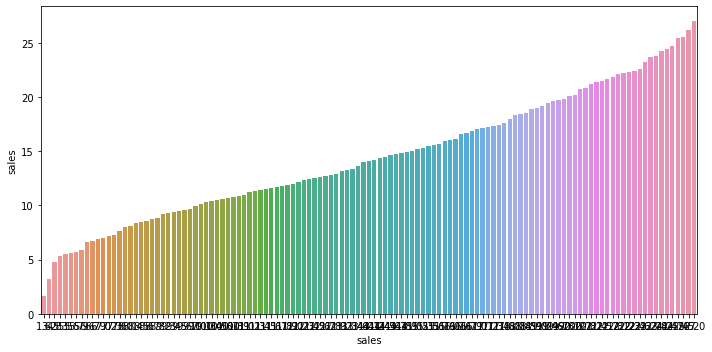

In [44]:
#Plottingbar graph showing feature with lable relation
for col in x1.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=y1,y=col[i],data=df)
    plt.tight_layout()
    plt.show()

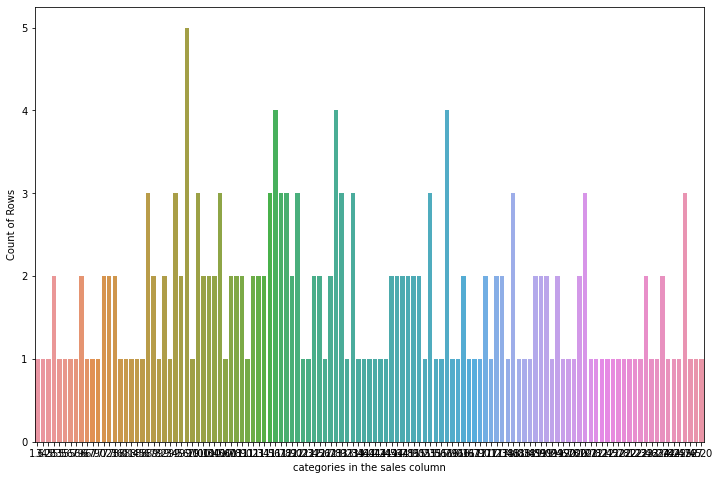

In [45]:
#CountPlot
plt.figure(figsize=(12,8))
sns.countplot(x='sales',data=df)
plt.xlabel('categories in the sales column')
plt.ylabel('Count of Rows')
plt.show()

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sales']=le.fit_transform(df['sales'])
le.inverse_transform([0,1,2])

array([1.6, 3.2, 4.8])

## ## CHECKING CORRELATION

In [47]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.053223
TV,0.017715,1.000000,0.054809,0.056648,0.798504
radio,-0.110680,0.054809,1.000000,0.354104,0.568682
newspaper,-0.154944,0.056648,0.354104,1.000000,0.213891
sales,-0.053223,0.798504,0.568682,0.213891,1.000000


<AxesSubplot:>

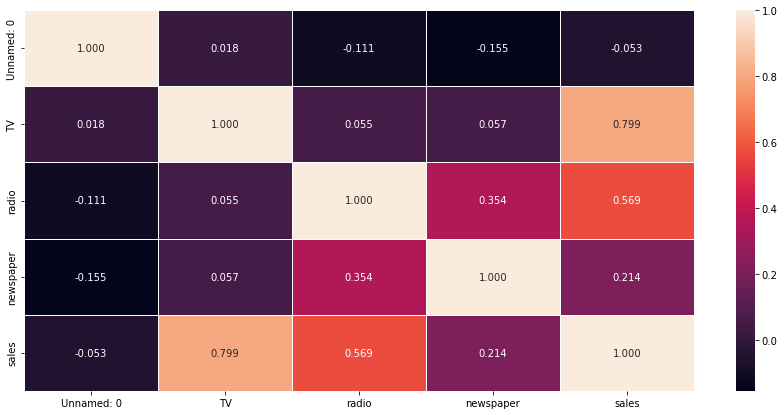

In [48]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5, fmt='.3f')

Unnamed: 0       AxesSubplot(0.125,0.657941;0.168478x0.222059)
TV            AxesSubplot(0.327174,0.657941;0.168478x0.222059)
radio         AxesSubplot(0.529348,0.657941;0.168478x0.222059)
newspaper     AxesSubplot(0.731522,0.657941;0.168478x0.222059)
sales            AxesSubplot(0.125,0.391471;0.168478x0.222059)
dtype: object

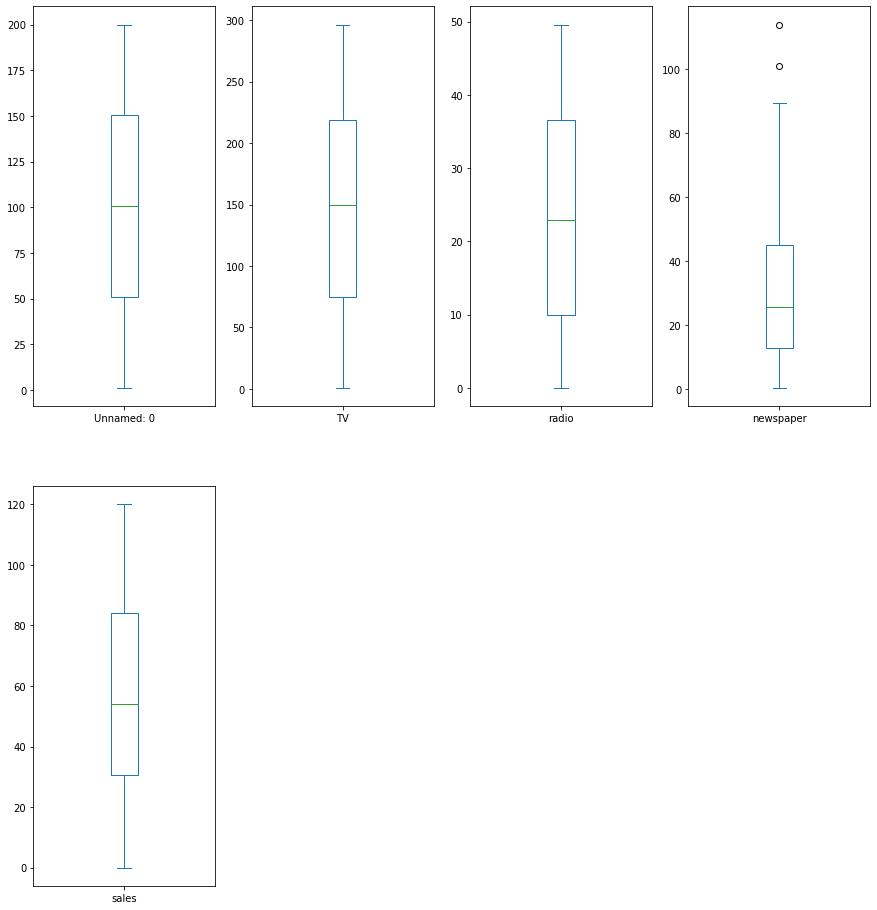

In [49]:
#checking outliers
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(15,25))

## CHECKING SKEWNESS

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TV', ylabel='Density'>

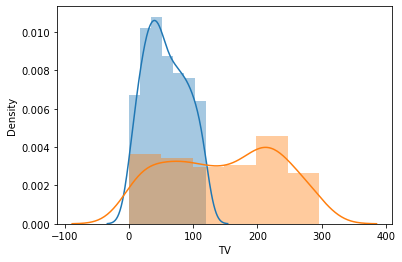

In [51]:
sns.distplot(df['sales'])
sns.distplot(df['TV'])

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='radio', ylabel='Density'>

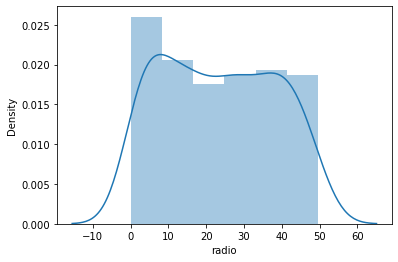

In [53]:
sns.distplot(df['radio'])

C:\Users\poonam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

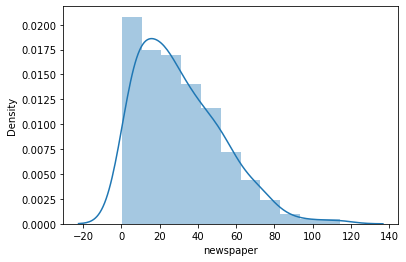

In [54]:
sns.distplot(df['newspaper'])

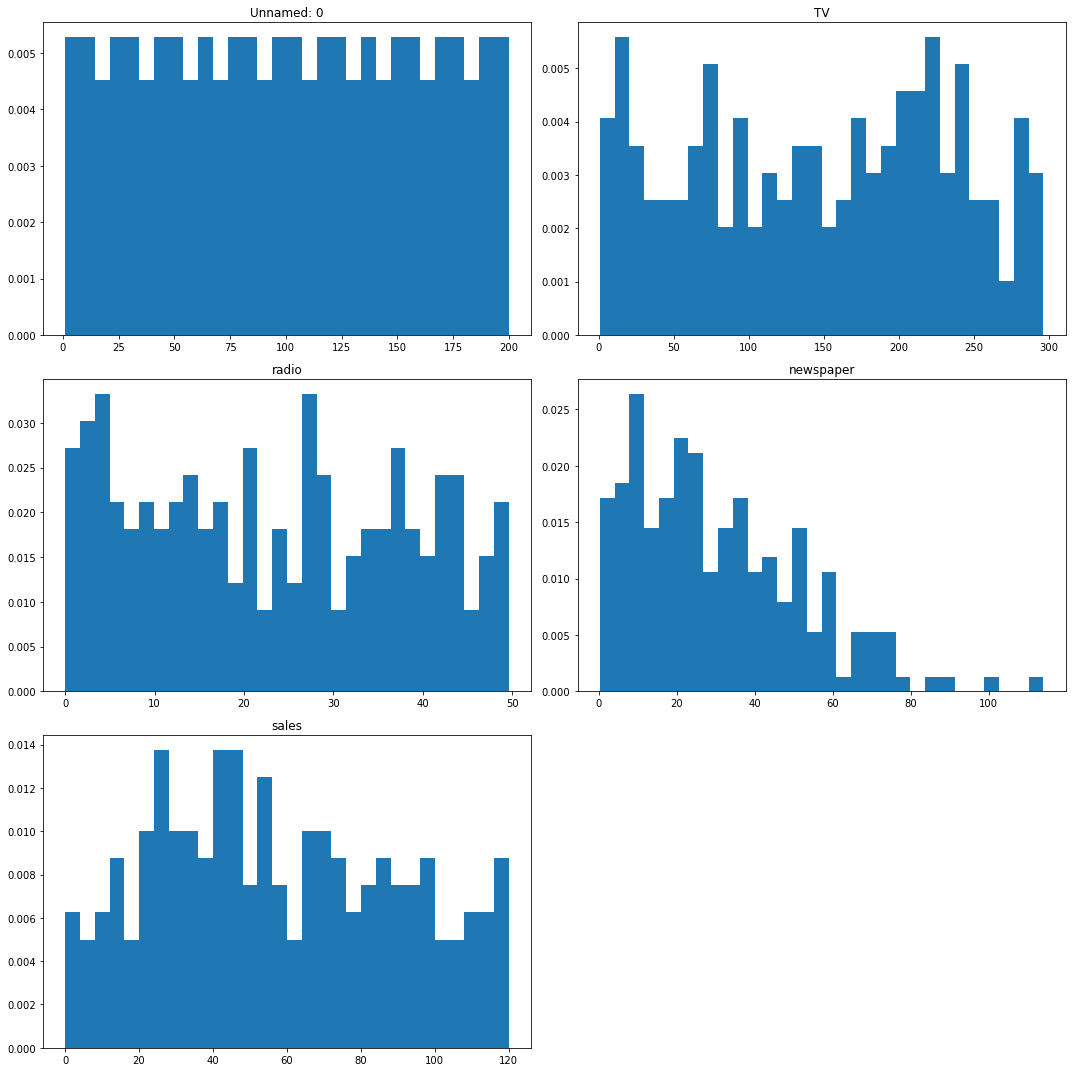

In [55]:
plt.rcParams['figure.figsize'] = (15,15)
df.hist(bins=30, density='True',label='Value',histtype='stepfilled',grid=False)
plt.tight_layout()
plt.show()

In [56]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.186833
dtype: float64

## MultiCollinearity with Variance Inflation Factor


In [57]:
df1=pd.DataFrame(data=df)
df1

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,106
1,2,44.5,39.3,45.1,31
2,3,17.2,45.9,69.3,23
3,4,151.5,41.3,58.5,89
4,5,180.8,10.8,58.4,54
...,...,...,...,...,...
195,196,38.2,3.7,13.8,14
196,197,94.2,4.9,8.1,27
197,198,177.0,9.3,6.4,53
198,199,283.6,42.0,66.2,118


In [58]:
x1=df1.iloc[:,:-1]
y1=df1.iloc[:,-1]

In [59]:
x1

,Unnamed: 0,TV,radio,newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


In [60]:
y1

0      106
1       31
2       23
3       89
4       54
      ... 
195     14
196     27
197     53
198    118
199     57
Name: sales, Length: 200, dtype: int64

In [61]:
x1.shape

(200, 4)

In [62]:
y1

0      106
1       31
2       23
3       89
4       54
      ... 
195     14
196     27
197     53
198    118
199     57
Name: sales, Length: 200, dtype: int64

In [63]:
y1.shape

(200,)

In [64]:
x1.shape

(200, 4)

In [65]:
y1.shape

(200,)

In [66]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [68]:
calc_vif(x1)

,variables,VIF FACTOR
0,Unnamed: 0,2.609076
1,TV,3.106114
2,radio,3.450875
3,newspaper,3.086776


In [70]:
x1=df1.drop(['TV','radio'],axis=1)
calc_vif(x1)

,variables,VIF FACTOR
0,Unnamed: 0,2.329137
1,newspaper,2.577109
2,sales,3.222254


## D3DATA CLEANING

In [71]:
df.drop(['TV','radio'],axis=1,inplace=True)
df

,Unnamed: 0,newspaper,sales
0,1,69.2,106
1,2,45.1,31
2,3,69.3,23
3,4,58.5,89
4,5,58.4,54
...,...,...,...
195,196,13.8,14
196,197,8.1,27
197,198,6.4,53
198,199,66.2,118


In [72]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Unnamed: 0,newspaper,sales
0,1.723412,1.778945,1.501661
1,1.706091,0.669579,0.814287
2,1.688771,1.783549,1.061322
3,1.671450,1.286405,0.976712
4,1.654129,1.281802,0.104063
...,...,...,...
195,1.654129,0.771217,1.339235
196,1.671450,1.033598,0.937804
197,1.688771,1.111852,0.134943
198,1.706091,1.640850,1.872212


In [73]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([1, 1], dtype=int64))


In [75]:
len(np.where(z>3)[0])

2

In [77]:
# removing outliers
df_new=df[(z<3).all(axis=1)]
print("Old Dataframe",df.shape)
print("New Dataframe",df_new.shape)
print("total_dropped_rows",df.shape[0] - df_new.shape[0])

Old Dataframe (200, 3)
New Dataframe (198, 3)
total_dropped_rows 2


In [78]:
# New Data Sets

In [79]:
X = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]

In [82]:
X

,Unnamed: 0,newspaper
0,1,69.2
1,2,45.1
2,3,69.3
3,4,58.5
4,5,58.4
...,...,...
195,196,13.8
196,197,8.1
197,198,6.4
198,199,66.2


In [84]:
y

0      106
1       31
2       23
3       89
4       54
      ... 
195     14
196     27
197     53
198    118
199     57
Name: sales, Length: 198, dtype: int64

In [85]:
X.skew()

Unnamed: 0   -0.006283
newspaper     0.650112
dtype: float64

In [86]:
#scaling data into standard scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(X)
x1

array([[-1.73103384e+00,  1.93299778e+00],
       [-1.71370862e+00,  7.51312752e-01],
       [-1.69638341e+00,  1.93790103e+00],
       [-1.67905820e+00,  1.40834924e+00],
       [-1.66173298e+00,  1.40344598e+00],
       [-1.64440777e+00,  2.21738670e+00],
       [-1.62708256e+00, -3.07790837e-01],
       [-1.60975734e+00, -8.91278462e-01],
       [-1.59243213e+00, -1.41102374e+00],
       [-1.57510692e+00, -4.20565756e-01],
       [-1.55778170e+00, -2.73468035e-01],
       [-1.54045649e+00, -1.26392602e+00],
       [-1.52313127e+00,  1.77119028e+00],
       [-1.50580606e+00, -1.10702179e+00],
       [-1.48848085e+00,  7.95442068e-01],
       [-1.47115563e+00,  1.13376683e+00],
       [-1.43650521e+00,  1.27596129e+00],
       [-1.41917999e+00, -5.62760219e-01],
       [-1.40185478e+00, -5.23534161e-01],
       [-1.38452957e+00,  1.15828311e+00],
       [-1.36720435e+00, -3.07790837e-01],
       [-1.34987914e+00,  9.71959333e-01],
       [-1.33255393e+00, -1.75402888e-01],
       [-1.

In [87]:
X.columns

Index(['Unnamed: 0', 'newspaper'], dtype='object')

In [88]:
x = pd.DataFrame(x1,columns=X.columns)
x

,Unnamed: 0,newspaper
0,-1.731034,1.932998
1,-1.713709,0.751313
2,-1.696383,1.937901
3,-1.679058,1.408349
4,-1.661733,1.403446
...,...,...
193,1.647383,-0.783407
194,1.664708,-1.062892
195,1.682033,-1.146248
196,1.699358,1.785900


## MACHINE LEARNING

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
lr = LinearRegression()

In [90]:
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is :  {r2_score(y_test,pred_test)}")

At random state 1, the training accuracy is : 0.04486241455445983
At random state 1, the testing accuracy is :  -0.01793087525269743
At random state 2, the training accuracy is : 0.0363269566204788
At random state 2, the testing accuracy is :  0.04808368493031723
At random state 3, the training accuracy is : 0.04629789974131726
At random state 3, the testing accuracy is :  0.0031390425728469173
At random state 4, the training accuracy is : 0.040916981383113615
At random state 4, the testing accuracy is :  0.05008966616529664
At random state 5, the training accuracy is : 0.03473895944782113
At random state 5, the testing accuracy is :  -0.02147152209113279
At random state 6, the training accuracy is : 0.02688156137476949
At random state 6, the testing accuracy is :  0.05532069993559796
At random state 7, the training accuracy is : 0.04928793862279446
At random state 7, the testing accuracy is :  -0.014873638245657794
At random state 8, the training accuracy is : 0.017083864793226766
At 

In [91]:
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is :  {r2_score(y_test,pred_test)}")

At random state 1, the training accuracy is : 0.04486241455445983
At random state 1, the testing accuracy is :  -0.01793087525269743
At random state 2, the training accuracy is : 0.0363269566204788
At random state 2, the testing accuracy is :  0.04808368493031723
At random state 3, the training accuracy is : 0.04629789974131726
At random state 3, the testing accuracy is :  0.0031390425728469173
At random state 4, the training accuracy is : 0.040916981383113615
At random state 4, the testing accuracy is :  0.05008966616529664
At random state 5, the training accuracy is : 0.03473895944782113
At random state 5, the testing accuracy is :  -0.02147152209113279
At random state 6, the training accuracy is : 0.02688156137476949
At random state 6, the testing accuracy is :  0.05532069993559796
At random state 7, the training accuracy is : 0.04928793862279446
At random state 7, the testing accuracy is :  -0.014873638245657794
At random state 8, the training accuracy is : 0.017083864793226766
At 

In [92]:
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is :  {r2_score(y_test,pred_test)}")
    print("\n")

At random state 1, the training accuracy is : 0.04486241455445983
At random state 1, the testing accuracy is :  -0.01793087525269743


At random state 2, the training accuracy is : 0.0363269566204788
At random state 2, the testing accuracy is :  0.04808368493031723


At random state 3, the training accuracy is : 0.04629789974131726
At random state 3, the testing accuracy is :  0.0031390425728469173


At random state 4, the training accuracy is : 0.040916981383113615
At random state 4, the testing accuracy is :  0.05008966616529664


At random state 5, the training accuracy is : 0.03473895944782113
At random state 5, the testing accuracy is :  -0.02147152209113279


At random state 6, the training accuracy is : 0.02688156137476949
At random state 6, the testing accuracy is :  0.05532069993559796


At random state 7, the training accuracy is : 0.04928793862279446
At random state 7, the testing accuracy is :  -0.014873638245657794


At random state 8, the training accuracy is : 0.01708386

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=111)

In [94]:
lr.fit(x_train,y_train)

LinearRegression()

In [95]:
pred_test = lr.predict(x_test)

In [96]:
print(r2_score(y_test,pred_test))

0.012230833048175516


## CROSS VALIDATION OF MODEL


In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
pred_test = lr.predict(x_test)

In [99]:
print(r2_score(y_test,pred_test))

0.012230833048175516


In [100]:
train_accuracy = r2_score(y_train,pred_train)
test_accuracy = r2_score(y_test,pred_test)

for j in range(2,10):
    cv_score = cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print(f"accuracy score for training is {train_accuracy}")
    print(f"accuracy score for testing is {test_accuracy}")

At cross fold 2 the cv score is -0.12187156472814031
accuracy score for training is -0.04621515606000792
accuracy score for testing is 0.012230833048175516
At cross fold 3 the cv score is 0.022380322477380494
accuracy score for training is -0.04621515606000792
accuracy score for testing is 0.012230833048175516
At cross fold 4 the cv score is 0.002480114792823007
accuracy score for training is -0.04621515606000792
accuracy score for testing is 0.012230833048175516
At cross fold 5 the cv score is 0.016779838230762102
accuracy score for training is -0.04621515606000792
accuracy score for testing is 0.012230833048175516
At cross fold 6 the cv score is -0.010929107538111068
accuracy score for training is -0.04621515606000792
accuracy score for testing is 0.012230833048175516
At cross fold 7 the cv score is -0.028479520952259887
accuracy score for training is -0.04621515606000792
accuracy score for testing is 0.012230833048175516
At cross fold 8 the cv score is -0.027814326413039298
accuracy

In [101]:
pred_test = lr.predict(x_test)

In [102]:
print(r2_score(y_test,pred_test))

0.012230833048175516


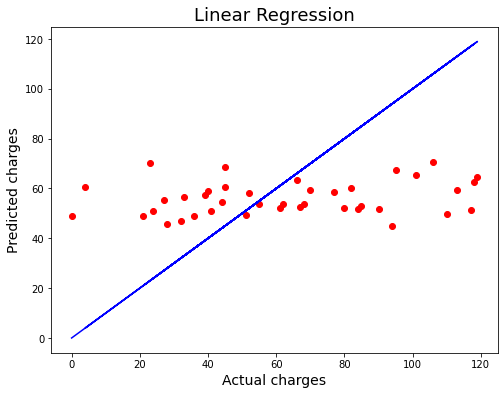

In [103]:
#ploting linear regression plot
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges', fontsize=14)
plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [105]:
def regressor(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=111)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

## REGRESSORS

In [106]:
#linear regression
model=LinearRegression()
regressor(model, x, y)

Root Mean Square Error is: 32.21849133116631
R2 Score is: 1.2230833048175516
Cross Validation Score is: 1.6779838230762103
R2 Score - Cross Validation Score is -0.45490051825865874


In [107]:
#lasso regression
model=Lasso(alpha=0.0001)
regressor(model, x, y)

Root Mean Square Error is: 32.21848619975463
R2 Score is: 1.2231147690458966
Cross Validation Score is: 1.678103564560631
R2 Score - Cross Validation Score is -0.4549887955147345


In [108]:
#Ridge Regression
model=Ridge(alpha=0.0001)
regressor(model, x, y)

Root Mean Square Error is: 32.21849158895877
R2 Score is: 1.2230817241138392
Cross Validation Score is: 1.6779859810587894
R2 Score - Cross Validation Score is -0.4549042569449502


In [109]:
#SVR with radial basis function kernel
model=SVR(kernel='rbf')
regressor(model, x, y)

Root Mean Square Error is: 33.219800887159025
R2 Score is: -5.012044829621853
Cross Validation Score is: 1.1832506912530083
R2 Score - Cross Validation Score is -6.195295520874861


In [110]:
#SVR with polynomial kernal
model=SVR(kernel='poly')
regressor(model, x, y)

Root Mean Square Error is: 35.16633551500005
R2 Score is: -17.679088487118634
Cross Validation Score is: -7.787130247616639
R2 Score - Cross Validation Score is -9.891958239501996


In [111]:
#SVR with linear kernal
model=SVR(kernel='linear')
regressor(model, x, y)

Root Mean Square Error is: 33.059474193612424
R2 Score is: -4.000864410808824
Cross Validation Score is: -0.43577754522235773
R2 Score - Cross Validation Score is -3.5650868655864665


In [112]:
model=DecisionTreeRegressor(random_state=111)
regressor(model, x, y)

Root Mean Square Error is: 46.879633104366334
R2 Score is: -109.12862083423782
Cross Validation Score is: -82.86768128287349
R2 Score - Cross Validation Score is -26.26093955136433


In [113]:
model=RandomForestRegressor()
regressor(model, x, y)

Root Mean Square Error is: 35.37061520528022
R2 Score is: -19.05024470460892
Cross Validation Score is: -13.782416397705216
R2 Score - Cross Validation Score is -5.267828306903706


In [114]:
model=SGDRegressor(penalty='l1', learning_rate='optimal')
regressor(model, x, y)

Root Mean Square Error is: 79.93929538405158
R2 Score is: -508.0869692727756
Cross Validation Score is: -7.973330484083396e+21
R2 Score - Cross Validation Score is 7.973330484083396e+21


In [115]:
model=AdaBoostRegressor(random_state=111)
regressor(model, x, y)

Root Mean Square Error is: 32.398904587698766
R2 Score is: 0.11374767249651141
Cross Validation Score is: -0.8393635571701141
R2 Score - Cross Validation Score is 0.9531112296666255


In [116]:
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
regressor(model, x, y)

Root Mean Square Error is: 34.80980612781763
R2 Score is: -15.305035595019678
Cross Validation Score is: -11.271354710545287
R2 Score - Cross Validation Score is -4.033680884474391


## HYPER PARAMETER TUNING

In [117]:
#support vector regressor
# creating parameters list to pass into GridSearchCV
parameters = {'kernel' : ['poly', 'linear', 'rbf'],
              'C': [2.0, 3.0, 4.0],
              'gamma' : ['scale', 'auto'],
              'epsilon': [0.2, 0.3, 0.4],
              'shrinking' : [True, False]}

In [118]:
GCV = GridSearchCV(SVR(), parameters, cv=5)

In [119]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [2.0, 3.0, 4.0], 'epsilon': [0.2, 0.3, 0.4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'linear', 'rbf'],
                         'shrinking': [True, False]})

In [120]:
GCV.best_params_

{'C': 3.0, 'epsilon': 0.3, 'gamma': 'auto', 'kernel': 'rbf', 'shrinking': True}

In [121]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [122]:
GCV.best_estimator_

SVR(C=3.0, epsilon=0.3, gamma='auto')

In [123]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [124]:
best_r2 = r2_score(y_test,GCV_pred,multioutput='variance_weighted')*100
print("R2 score for best model is :", best_r2)

R2 score for best model is : -1.204424184897257


## SAVING MODEL IN PICKLE FORMAT

In [125]:
import pickle
a=np.array(y_test)
predicted=np.array(GCV.best_estimator_.predict(x_test))
df_comparision = pd.DataFrame({"orignal":a,"predicted":predicted},index= range(len(a)))

In [126]:
df_comparision

,orignal,predicted
0,0,46.773480
1,44,50.620550
2,21,46.722390
3,94,50.591358
4,117,52.282734
5,36,44.892383
6,45,60.857404
7,61,49.965130
8,118,59.146165
9,51,43.997247


## Comparison Between Orignal and Predicted Data

As we can see the diffrence between orignal and predicted data is almost same. so that my model is perfect as per my observation.
